In [11]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

### Dataset

In [28]:
df = pd.read_csv("sensor_data_hours_updated.csv")
x = df['X']
y = df['Y']
z = df['Z']
time = df['Timestamp'].unique()[:2000]
Sensors = set(df["Sensor_number"])
average_temp = df.groupby('Timestamp')['Temperature'].mean().reset_index()
num_of_timestamps = set(df["Timestamp"])
print(len(num_of_timestamps))


8784


### Graph Sensor Locations

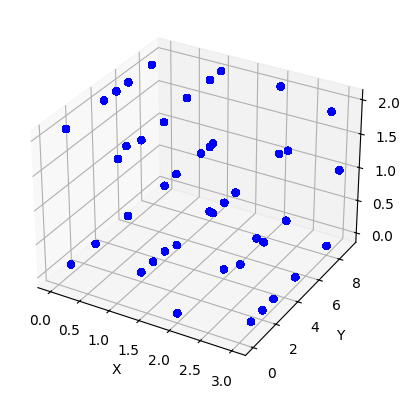

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(x, y, z, c='b', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

### Graph Temperature Behavior

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np
from datetime import datetime, timedelta

# Load the data from your CSV file
df = pd.read_csv("sensor_data_hours_updated.csv")

# Group the data by 'Timestamp' and calculate the mean temperature for each timestamp
average_temp = df.groupby('Timestamp')['Temperature'].mean().reset_index()

# Assuming you want to work with a specific subset of unique timestamps
unique_timestamps = df['Timestamp'].unique()[:2000]

# Create an empty DataFrame to store the results
result_df = pd.DataFrame(columns=['Timestamp', 'Average_Temperature'])

# Calculate the average temperature for each unique timestamp
for timestamp in unique_timestamps:
    avg_temp = average_temp[average_temp['Timestamp'] == timestamp]['Temperature'].values[0]
    result_df = pd.concat([result_df, pd.DataFrame({'Timestamp': [timestamp], 'Average_Temperature': [avg_temp]})], ignore_index=True)

# Now result_df contains the average temperature for each unique timestamp



C:\Users\kapue\AppData\Local\Temp\ipykernel_22996\1545336875.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, pd.DataFrame({'Timestamp': [timestamp], 'Average_Temperature': [avg_temp]})], ignore_index=True)


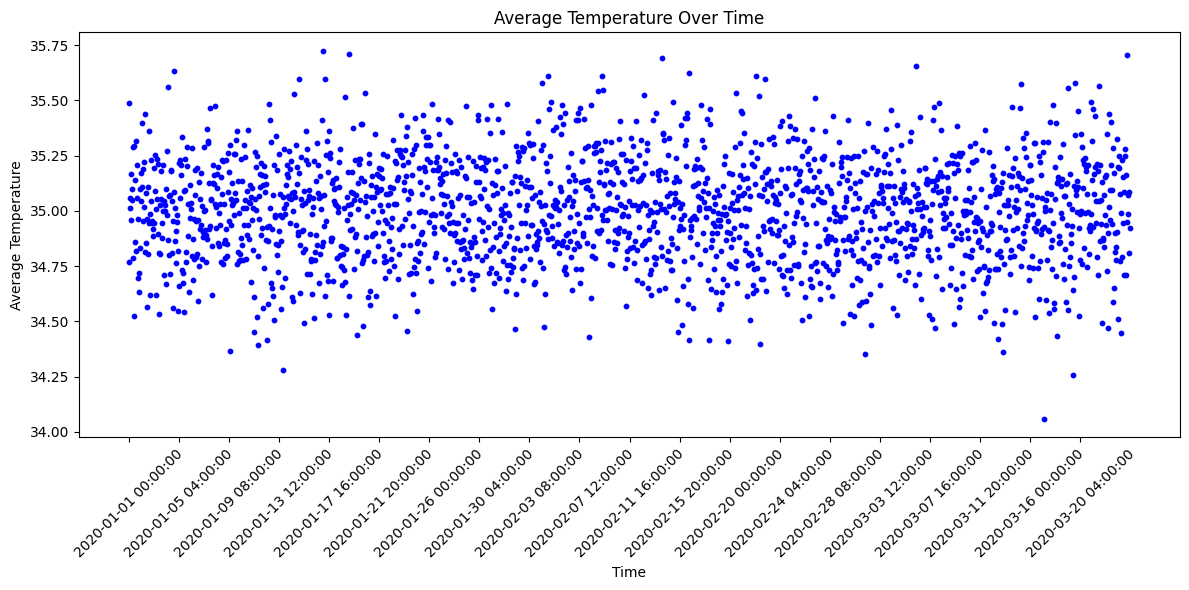

In [20]:
import matplotlib.pyplot as plt

# Plotting the scatterplot
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

plt.scatter(result_df['Timestamp'], result_df['Average_Temperature'], s=10, c='b', marker='o')
plt.xlabel('Time')
plt.ylabel('Average Temperature')
plt.title('Average Temperature Over Time')

# Limit the number of x-axis labels
n = 20  # Choose the number of labels you want to display
every_nth_label = len(result_df) // n

plt.xticks(result_df.index[::every_nth_label], result_df['Timestamp'][::every_nth_label], rotation=45)

plt.tight_layout()  # Ensures labels fit within the figure

plt.show()



### Interpolated Data

C:\Users\kapue\AppData\Local\Temp\ipykernel_22996\3679672785.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, pd.DataFrame({'Timestamp': [timestamp], 'Average_Temperature': [avg_temp]})], ignore_index=True)


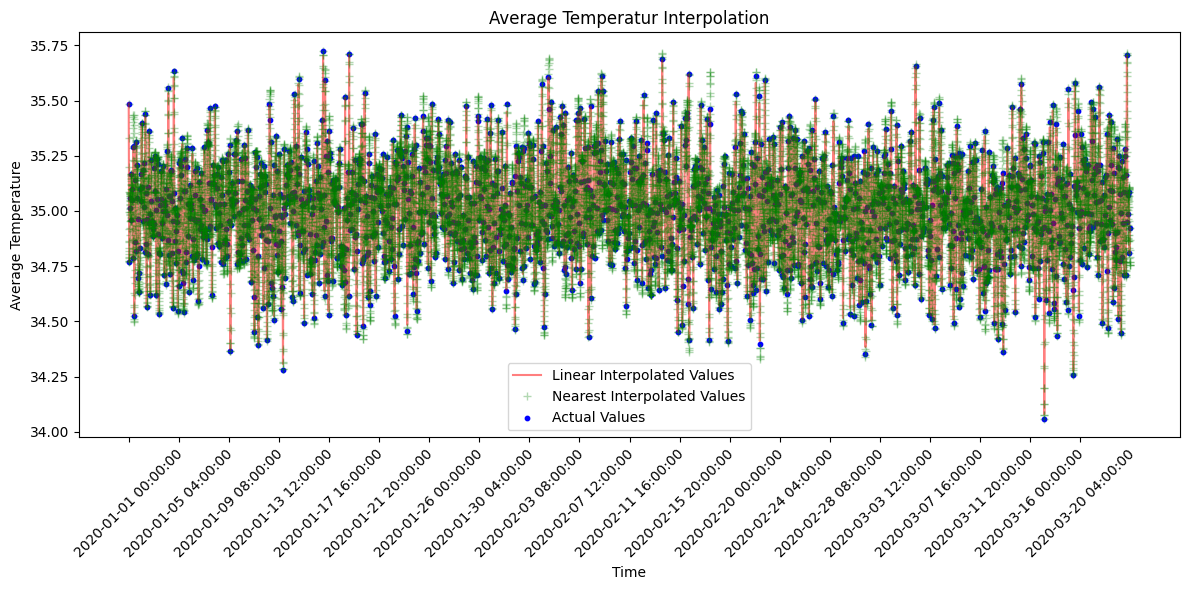

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

# Load the data from your CSV file
df = pd.read_csv("sensor_data_hours_updated.csv")

# Group the data by 'Timestamp' and calculate the mean temperature for each timestamp
average_temp = df.groupby('Timestamp')['Temperature'].mean().reset_index()

# Assuming you want to work with a specific subset of unique timestamps
unique_timestamps = df['Timestamp'].unique()[:2000]

# Create an empty DataFrame to store the results
result_df = pd.DataFrame(columns=['Timestamp', 'Average_Temperature'])

# Calculate the average temperature for each unique timestamp
for timestamp in unique_timestamps:
    avg_temp = average_temp[average_temp['Timestamp'] == timestamp]['Temperature'].values[0]
    result_df = pd.concat([result_df, pd.DataFrame({'Timestamp': [timestamp], 'Average_Temperature': [avg_temp]})], ignore_index=True)

# Perform linear interpolation
x = np.arange(0, len(result_df))
y = result_df['Average_Temperature'].values
f = interpolate.interp1d(x, y)
fn = interpolate.interp1d(x, y, kind='cubic')

# Generate new x values for interpolation
xnew = np.linspace(0, len(result_df) - 1, num=len(result_df) * 10)
ynew = f(xnew)
ynearest = fn(xnew)

# Plot the scatterplot with interpolated values
plt.figure(figsize=(12, 6))

# Plot the interpolated values in the background (red line)
plt.plot(xnew, ynew, '-', c='r', alpha=0.5, label='Linear Interpolated Values')
plt.plot(xnew, ynearest, '+', c='g', alpha=0.3, label='Nearest Interpolated Values')

# Plot the actual values (blue dots) in the foreground
plt.scatter(result_df['Timestamp'], result_df['Average_Temperature'], s=10, c='b', marker='o', label='Actual Values')

plt.xlabel('Time')
plt.ylabel('Average Temperature')
plt.title('Average Temperatur Interpolation')

# Limit the number of x-axis labels
n = 20
every_nth_label = len(result_df) // n
plt.xticks(result_df.index[::every_nth_label], result_df['Timestamp'][::every_nth_label], rotation=45)
plt.legend()

plt.tight_layout()
plt.show()
